#### Defining The Model purely based on Classes of python using Numpy and not using Pytorch or Sklearn libraries

In [ ]:
import numpy as np

def linearRegression(X: np.array, Y: np.array, lr: float, lambda_: float):
    """
    Implements L1-regularized Linear Regression (Lasso) using gradient descent.
    """
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    num_iterations = 1000

    for _ in range(num_iterations):
        # Predictions
        y_pred = np.dot(X, weights) + bias

        # Compute gradients
        error = y_pred - Y
        dw = (1/m) * np.dot(X.T, error) + lambda_ * np.sign(weights)
        db = (1/m) * np.sum(error)

        # Update parameters
        weights -= lr * dw
        bias -= lr * db

    return weights


## *Implementing this on the Famous Housing Dataset*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
housing = fetch_california_housing()

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.shape

(20640, 8)

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

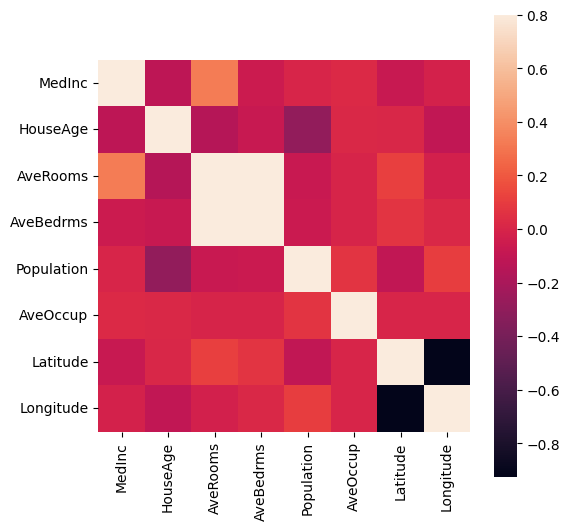

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
Y = pd.Series(housing.target)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Convert to NumPy
X_np = X_scaled.to_numpy()
Y_np = Y.to_numpy()

# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_np, Y_np, test_size=0.2, random_state=42)

In [ ]:
# Train model
lr = 0.01
lambda_ = 0.1
weights, bias = linearRegression(X_train, Y_train, lr=lr, lambda_=lambda_)

# Predict on test
Y_pred = np.dot(X_test, weights) + bias

# Evaluation
mse = np.mean((Y_pred - Y_test) ** 2)
mae = np.mean(np.abs(Y_pred - Y_test))

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.6793981580916617
Mean Absolute Error: 0.622018780685286


In [ ]:
mean_pred = np.mean(Y_test)
baseline_mse = np.mean((Y_test - mean_pred)**2)
baseline_mae = np.mean(np.abs(Y_test - mean_pred))

print("Baseline MSE:", baseline_mse)
print("My Model MSE:", mse)

Baseline MSE: 1.3104089782408996
Your Model MSE: 0.6793981580916617
